## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


## Loading Dataset

In [7]:
data1 = pd.read_csv('applicant.csv')

In [8]:
data2 = pd.read_csv('loan.csv')

In [9]:
#Merging the datasets

data = pd.merge(data1,data2,on='applicant_id',how='outer')
data.head(5)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

#### We know that telephone and id are not valuable at all and since the major part of EMI plans is null it will only bring error to our model so lets remove these columns firsthand

In [11]:
col_to_drop = ["Telephone", "applicant_id", "loan_application_id", "Other_EMI_plans"]
data.drop(col_to_drop, axis = 1, inplace = True)

In [12]:
data.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1


In [13]:
data.isnull().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                   

In [14]:
data.corr()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Primary_applicant_age_in_years,1.000000,0.118201,0.266419,0.006151,-0.036136,0.032716,0.058266,-0.018357,-0.023923,0.149254,-0.091127
Number_of_dependents,0.118201,1.000000,0.042643,-0.077071,-0.023834,0.017142,-0.071207,-0.032817,0.036589,0.109667,-0.003015
Years_at_current_residence,0.266419,0.042643,1.000000,0.054097,0.034067,0.028926,0.049302,0.001623,-0.028334,0.089625,0.002967
Foreign_worker,0.006151,-0.077071,0.054097,1.000000,0.138196,0.050050,0.090024,-0.066338,-0.097256,0.009717,0.082079
Months_loan_taken_for,-0.036136,-0.023834,0.034067,0.138196,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,0.214927
Principal_loan_amount,0.032716,0.017142,0.028926,0.050050,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.154739
EMI_rate_in_percentage_of_disposable_income,0.058266,-0.071207,0.049302,0.090024,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.072404
Has_coapplicant,-0.018357,-0.032817,0.001623,-0.066338,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,0.062728
Has_guarantor,-0.023923,0.036589,-0.028334,-0.097256,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.055039
Number_of_existing_loans_at_this_bank,0.149254,0.109667,0.089625,0.009717,-0.011284,0.020795,0.021669,-0.006001,-0.024682,1.000000,-0.045732


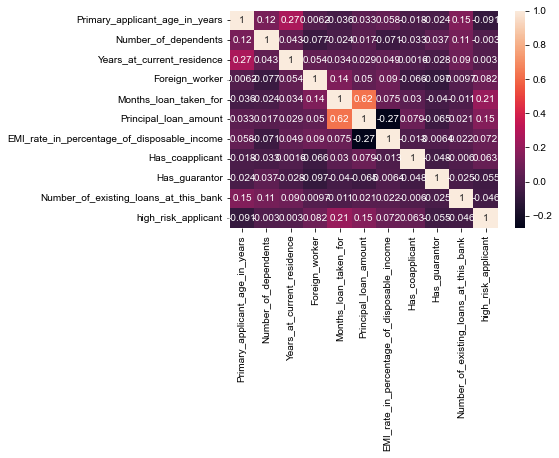

In [15]:
dataplot = sns.heatmap(data.corr(),annot=True)
sns.set(rc={'figure.figsize':(14, 18)})
plt.show()

So single features like gender marital status, Years at current residence are barely affecting the risk so we will neglect them

<AxesSubplot:xlabel='Gender', ylabel='count'>

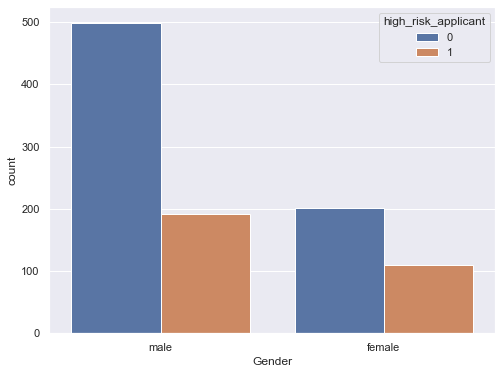

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Gender',hue='high_risk_applicant')

## Preparing Data
### Now lets remove all the columns that are not required for our prediction

In [17]:
col_to_drop = ["Has_been_employed_for_at_most","Balance_in_existing_bank_account_(lower_limit_of_bucket)", "Balance_in_existing_bank_account_(upper_limit_of_bucket)","Property","Employment_status","Marital_status","Has_been_employed_for_at_least"]
data.drop(col_to_drop, axis = 1, inplace = True)

In [18]:
data.isnull().sum()

Primary_applicant_age_in_years                   0
Gender                                           0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Foreign_worker                                   0
Savings_account_balance                        183
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

In [19]:
Purpose = {"electronic equipment": 1, "education": 2, "FF&E": 3, 'new vehicle': 4,
       'used vehicle': 5, 'business': 6, 'domestic appliances': 7, 'repair costs': 8
       , 'career development': 9}
data['Purpose'] = data['Purpose'].map(Purpose)

### This is how I am handling my categorical and null values

In [20]:
mean = data['Purpose'].mean()
std = data['Purpose'].std()
is_null = data['Purpose'].isnull().sum()

#compute random numbers between the mean, std and is_null
random_age = np.random.randint(mean-std, mean+std, size = is_null)

# fill NaN values in Age column with random values generated
Purpose_new = data['Purpose'].copy()
Purpose_new[np.isnan(Purpose_new)] = random_age
data['Purpose'] = Purpose_new

In [21]:
data['Savings_account_balance'].unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

In [22]:
 Saving_bal= {"Low":1, "High":3, "Very High":4,"Medium":2}
data['Savings_account_balance'] = data['Savings_account_balance'].map(Saving_bal)

In [23]:
mean = data['Savings_account_balance'].mean()
std = data['Savings_account_balance'].std()
is_null = data['Savings_account_balance'].isnull().sum()

#compute random numbers between the mean, std and is_null
random_age = np.random.randint(mean-std, mean+std, size = is_null)

# fill NaN values in Age column with random values generated
Purpose_new = data['Savings_account_balance'].copy()
Purpose_new[np.isnan(Purpose_new)] = random_age
data['Savings_account_balance'] = Purpose_new

In [24]:
Loan_history = {'critical/pending loans at other banks': 1,
       'existing loans paid back duly till now': 2,
       'delay in paying off loans in the past': 3,
       'no loans taken/all loans paid back duly': 4,
       'all loans at this bank paid back duly': 5}
data['Loan_history'] = data['Loan_history'].map(Loan_history)

In [25]:
data.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Housing,Years_at_current_residence,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,1,own,4,1,0.0,6,1.0,1169000,4,0,0,2,1,0
1,22,female,1,own,2,1,1.0,48,1.0,5951000,2,0,0,1,2,1
2,49,male,2,own,3,1,1.0,12,2.0,2096000,2,0,0,1,1,0
3,45,male,2,for free,4,1,1.0,42,3.0,7882000,2,0,1,1,2,0
4,53,male,2,for free,4,1,1.0,24,4.0,4870000,3,0,0,2,3,1


In [26]:
Gender = {'male':0, 'female':1}
data['Gender'] = data['Gender'].map(Gender)

In [27]:
data['Housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [28]:
Housing = {'own':0, 'for free':1,'rent':2}
data['Housing'] = data['Housing'].map(Housing)

In [29]:
data.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Housing,Years_at_current_residence,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,0,1,0,4,1,0.0,6,1.0,1169000,4,0,0,2,1,0
1,22,1,1,0,2,1,1.0,48,1.0,5951000,2,0,0,1,2,1
2,49,0,2,0,3,1,1.0,12,2.0,2096000,2,0,0,1,1,0
3,45,0,2,1,4,1,1.0,42,3.0,7882000,2,0,1,1,2,0
4,53,0,2,1,4,1,1.0,24,4.0,4870000,3,0,0,2,3,1


In [30]:
data.isnull().sum()

Primary_applicant_age_in_years                 0
Gender                                         0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Foreign_worker                                 0
Savings_account_balance                        0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
dtype: int64

## Splitting Data

In [31]:
#input and output data

x = data.drop('high_risk_applicant', axis = 1)
y = data['high_risk_applicant']

In [32]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: high_risk_applicant, dtype: int64

In [33]:
x.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Housing,Years_at_current_residence,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,0,1,0,4,1,0.0,6,1.0,1169000,4,0,0,2,1
1,22,1,1,0,2,1,1.0,48,1.0,5951000,2,0,0,1,2
2,49,0,2,0,3,1,1.0,12,2.0,2096000,2,0,0,1,1
3,45,0,2,1,4,1,1.0,42,3.0,7882000,2,0,1,1,2
4,53,0,2,1,4,1,1.0,24,4.0,4870000,3,0,0,2,3


In [34]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
xtest, xtrain, ytest, ytrain = train_test_split(x, y, test_size = 0.20, random_state = 31)

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [36]:
# we already imported all the required libraries
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC

In [37]:
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 12)

In [38]:
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=12)

In [39]:
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [40]:
#finding accuracy
from sklearn.metrics import accuracy_score

svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [41]:
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Support Vector      :  71.38
Decision Tree       :  63.0
K-NN Classifier     :  71.0
Random Forest       :  71.38


### Confusion matrix for two models

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,dt_classifier_ypred)

array([[388, 177],
       [119, 116]], dtype=int64)

In [43]:
confusion_matrix(ytest, svc_classifier_ypred)

array([[519,  46],
       [183,  52]], dtype=int64)

In [44]:
ytest.head(10)

545    1
215    0
589    1
582    0
544    0
187    0
909    0
55     0
444    1
907    0
Name: high_risk_applicant, dtype: int64

In [45]:
rf_classifier_ypred[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [46]:
knn_classifier_ypred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

### To save the model for future use

In [47]:
import pickle
  
# Save the trained model as a pickle string.
credit_risk = pickle.dumps(knn_classifier)
  
# Load the pickled model
knn_from_pickle = pickle.loads(credit_risk)
  
# Use the loaded pickled model to make predictions

#knn_from_pickle.predict(xtest)

In [48]:
knn_from_pickle.predict(xtest)[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

# Thank you